In [74]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
import missingno as mno
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold

In [44]:
clevelandData = pd.read_csv("processed.cleveland.data", sep =",", header= None, na_values=["?"])
switzerlandData = pd.read_csv("processed.switzerland.data", sep= ",", header= None, na_values=["?"])
longbeachData = pd.read_csv("processed.va.data", sep = "," , header=None, na_values=["?"])
hungarianData = pd.read_csv("reprocessed.hungarian.data", sep = " " , header=None, na_values=["?"])
data = pd.concat([clevelandData, switzerlandData, longbeachData, hungarianData])
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs" , "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "prediction"]

In [45]:
data = data.dropna(axis= 0, subset=["prediction"])
data.isnull().sum()/len(data)
data.dtypes

data[data<0].count()
## mno.matrix(data, figsize=(20,6))


age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak        12
slope         190
ca            290
thal          266
prediction      0
dtype: int64

In [46]:
nanImpute = SimpleImputer(missing_values=np.nan, strategy='mean')
dataval = nanImpute.fit_transform(data)

data = pd.DataFrame(dataval, columns=  ["age", "sex", "cp", "trestbps", "chol", "fbs" , "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "prediction"])

data[["age", "sex","cp", "restecg","thalach", "slope", "ca" , "thal"]] = data[["age", "sex","cp", "restecg","thalach", "slope", "ca" , "thal"]].astype(int)
data[["fbs", "exang"]] = data[["fbs", "exang"]].astype(bool)

In [47]:
data[data<0].count()
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
dataToScale = data [["age", "sex", "cp", "trestbps", "chol", "restecg", "thalach", "oldpeak", "slope", "ca", "thal"]]
normalizedValues = scaler.fit_transform(dataToScale)
normalizedData = pd.DataFrame(normalizedValues, columns= dataToScale.columns)
normalizedData = normalizedData.join(data[["fbs", "exang","prediction"]])


<Axes: >

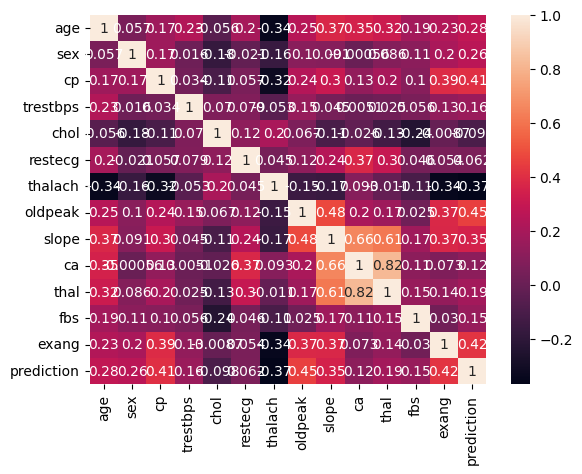

In [48]:
corrMatrix = normalizedData.corr()
sn.heatmap(corrMatrix, annot=True)


[5.942e+00 1.852e+01 2.674e+01 3.022e-01 4.628e+00 4.382e-02 3.017e+00
 6.934e+00 2.895e+01 4.083e+00 1.723e+01 3.844e+01 1.092e+02]


<Axes: >

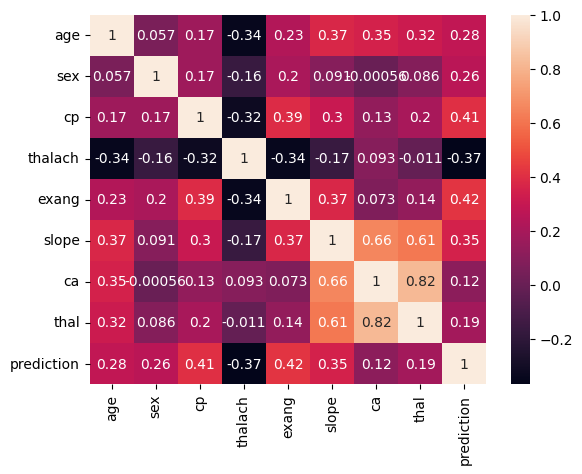

In [75]:
variables =  normalizedData.iloc[:,normalizedData.columns != "prediction"]
predictions = normalizedData["prediction"]  
selector = SelectKBest(chi2, k=8).fit(variables, predictions)

np.set_printoptions(precision=3)

print (selector.scores_)

bestKSelected = selector.get_support(indices=True)
selectedData = data.iloc[:, bestKSelected]
predictions = predictions.to_frame()
selectedData = selectedData.join(predictions)

corrSelectedData = selectedData.corr()

sn.heatmap(corrSelectedData, annot= True)


In [81]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(selectedData.loc[:,selectedData.columns!= "prediction"],selectedData["prediction"])

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

selectedColNames = fit.get_support(indices=True)

SelectedValues = selectedData.iloc[:, selectedColNames]

c:\Users\migli\source\repos\PyHeartDisease\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Num Features: 5
Selected Features: [False  True  True False  True  True  True False]
Feature Ranking: [4 1 1 3 1 1 1 2]


c:\Users\migli\source\repos\PyHeartDisease\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
